#Performance Innovative Task in Advanced Engineering Mathematics

The necessary packages were already imported from the code below. **DO NOT** use any other packages.

In [165]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
# from google.colab import files
from math import ceil

Define your period $T=3$. Define your interval from -6 to 6. Define also your samples to 10KHz (good for the entire interval).

In [166]:
T=3
a=-6
b=6
num_samples = 10000

Define your complex-valued function. Make your own.

In [167]:
func = lambda t: (np.cos((t % T)*np.pi))**3 + ((t % T) - (3*T)) ** 5 * 1j

Define your discrete values of $t$ (range, true $f(t)$, real true value, and imaginary true value).

In [168]:
t_range = np.linspace(a,b,num_samples)
y_true_real = [y.real for y in func(t_range)]
y_true_imag = [y.imag for y in func(t_range)]

coeffs_real = []
coeffs_imag = []

Create a python function to integrate on complex field and return the said integral. This can be done by creating another function that defines the real function and the imaginary function.

In [169]:
def complex_quad(f,a,b,**kwargs):
    def real_func(x):
        return np.real(f(x))
    def imag_func(x):
        return np.imag(f(x))
    
    real_integral = spi.quad(real_func,a,b,**kwargs)
    imag_integral = spi.quad(imag_func,a,b,**kwargs)
    
    integral = (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])
    return integral

Create a function that computes the complex Fourier series using $c_{n}$ coefficients and return the value for $c_{n}$ in complex form. Print the real values and imaginary values separately in every iteration.

In [170]:
def compute_cn_coeffs(func, N):
    coeffs = []
    for n in range(-N, N+1):
        cn = (1./T) * complex_quad(lambda t: func(t) * np.exp(-1j * 2 * np.pi * n * t / T), 0, T)[0]
        coeffs.append(cn)
        
        if N == 20:
            coeffs_real.append(cn.real)
            coeffs_imag.append(cn.imag)
            
    return np.array(coeffs)


def complex_fourier_series(t, cn_coeffs):
    result = 0.0 + 0.0j
    L = int((len(cn_coeffs) - 1) / 2)
    for n in range(-L, L+1):
        c = cn_coeffs[n+L]
        result +=  c * np.exp(1j * 2. * np.pi * n * t / T)
        
    return result

n=20
for N in range(1,n+1):    
    C = compute_cn_coeffs(func, N)
    y_approx = complex_fourier_series(t_range, C)

Define two columns for your graphs. The left one column must contain the real components and the right function for the imaginary. Plot your true function $f(t)$ , in the given interval, in blue and the approximation in red. Iterate up to 20 and graph each iteration.

Label each graph as "$Re(z), n=N$", where $N$ is your iteration number, for real function and "$Im(z), n=N$", where $N$ is your iteration number, for the imaginary function.

In [171]:
def showGraph():
    maxN=20
    COLs = 2 
    ROWs = maxN #rows of plt
    plt.rcParams['font.size'] = 8
    plt.rcParams['figure.figsize'] = [12,24]
    fig, axs = plt.subplots(ROWs, COLs)
    fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
    
    for N in range(1, maxN + 1):
        C = compute_cn_coeffs(func, N)
        y_approx = complex_fourier_series(t_range, C)
        
        row = (N-1)
        axs[row, 0].set_title('Re(z), n=' + str(N))
        axs[row, 1].set_title('Im(z), n=' + str(N))
        axs[row, 0].scatter(t_range, y_true_real, color='blue', s=1, marker='.')
        axs[row, 0].scatter(t_range, [y.real for y in y_approx], color='red', s=2, marker='.')
        axs[row, 1].scatter(t_range, y_true_imag, color='blue', s=1, marker='.')
        axs[row, 1].scatter(t_range, [y.imag for y in y_approx], color='red', s=2, marker='.')
        
    plt.show()

Extract and print your real coefficients and imaginary coefficients.

In [172]:
print("Real\t\t\tImag")
for i in range(len(coeffs_real)):
    print(f'{coeffs_real[i]}\t{coeffs_imag[i]}')    

Real			Imag
407.971037871052	-4.984662769679639
429.43790629594855	-5.5240010012564085
453.28902581124726	-6.155742694469912
479.9449014337314	-6.902260291870606
509.9310805581561	-7.7931297391641365
543.9131301502812	-8.868103817944288
582.7465837091664	-10.181622233114922
627.5499045981392	-11.809837934114682
679.8138648913969	-13.861901699664916
741.5704585488713	-16.498730987751248
815.6629061563726	-19.965522637465103
906.1951119277946	-24.65083639890064
1019.3169386890386	-31.20028963611057
1164.6793466314555	-40.75111410238128
1358.3355077615681	-55.45948876456782
1629.0931256204724	-79.80733134881575
2034.2741426182533	-124.85149205693244
2706.341855527049	-221.61100247723894
4033.7358362265886	-496.9285881366502
7791.065810575275	-1953.8808577168365
1.1219103335252574e-16	-26932.5
-7791.065810575275	-1953.490618064165
-4033.7358362265886	-497.4546739265626
-2706.341855527051	-221.78076774987022
-2034.2741426182524	-124.84059802874215
-1629.093125620467	-80.0798001929755
-1358.

From your extracted values, export them into a text file named "Fourier Coefficients.txt" and have your user directly download the said file into its local directory (download to PC or laptop). Separate all real values from the imaginary values.

In [173]:
# with open('Fourier Coefficients.txt', 'w') as f:
#   f.write("Real Values:\n")
#   for i in range(0, len(coeffs_real)):
#     f.write(str(coeffs_real[i])+"\n")
#   f.write("\nImaginary Values:\n")
#   for i in range(0, len(coeffs_real)):
#     f.write(str(coeffs_imag[i])+"\n")

# files.download('Fourier Coefficients.txt')

Show your generated graphs

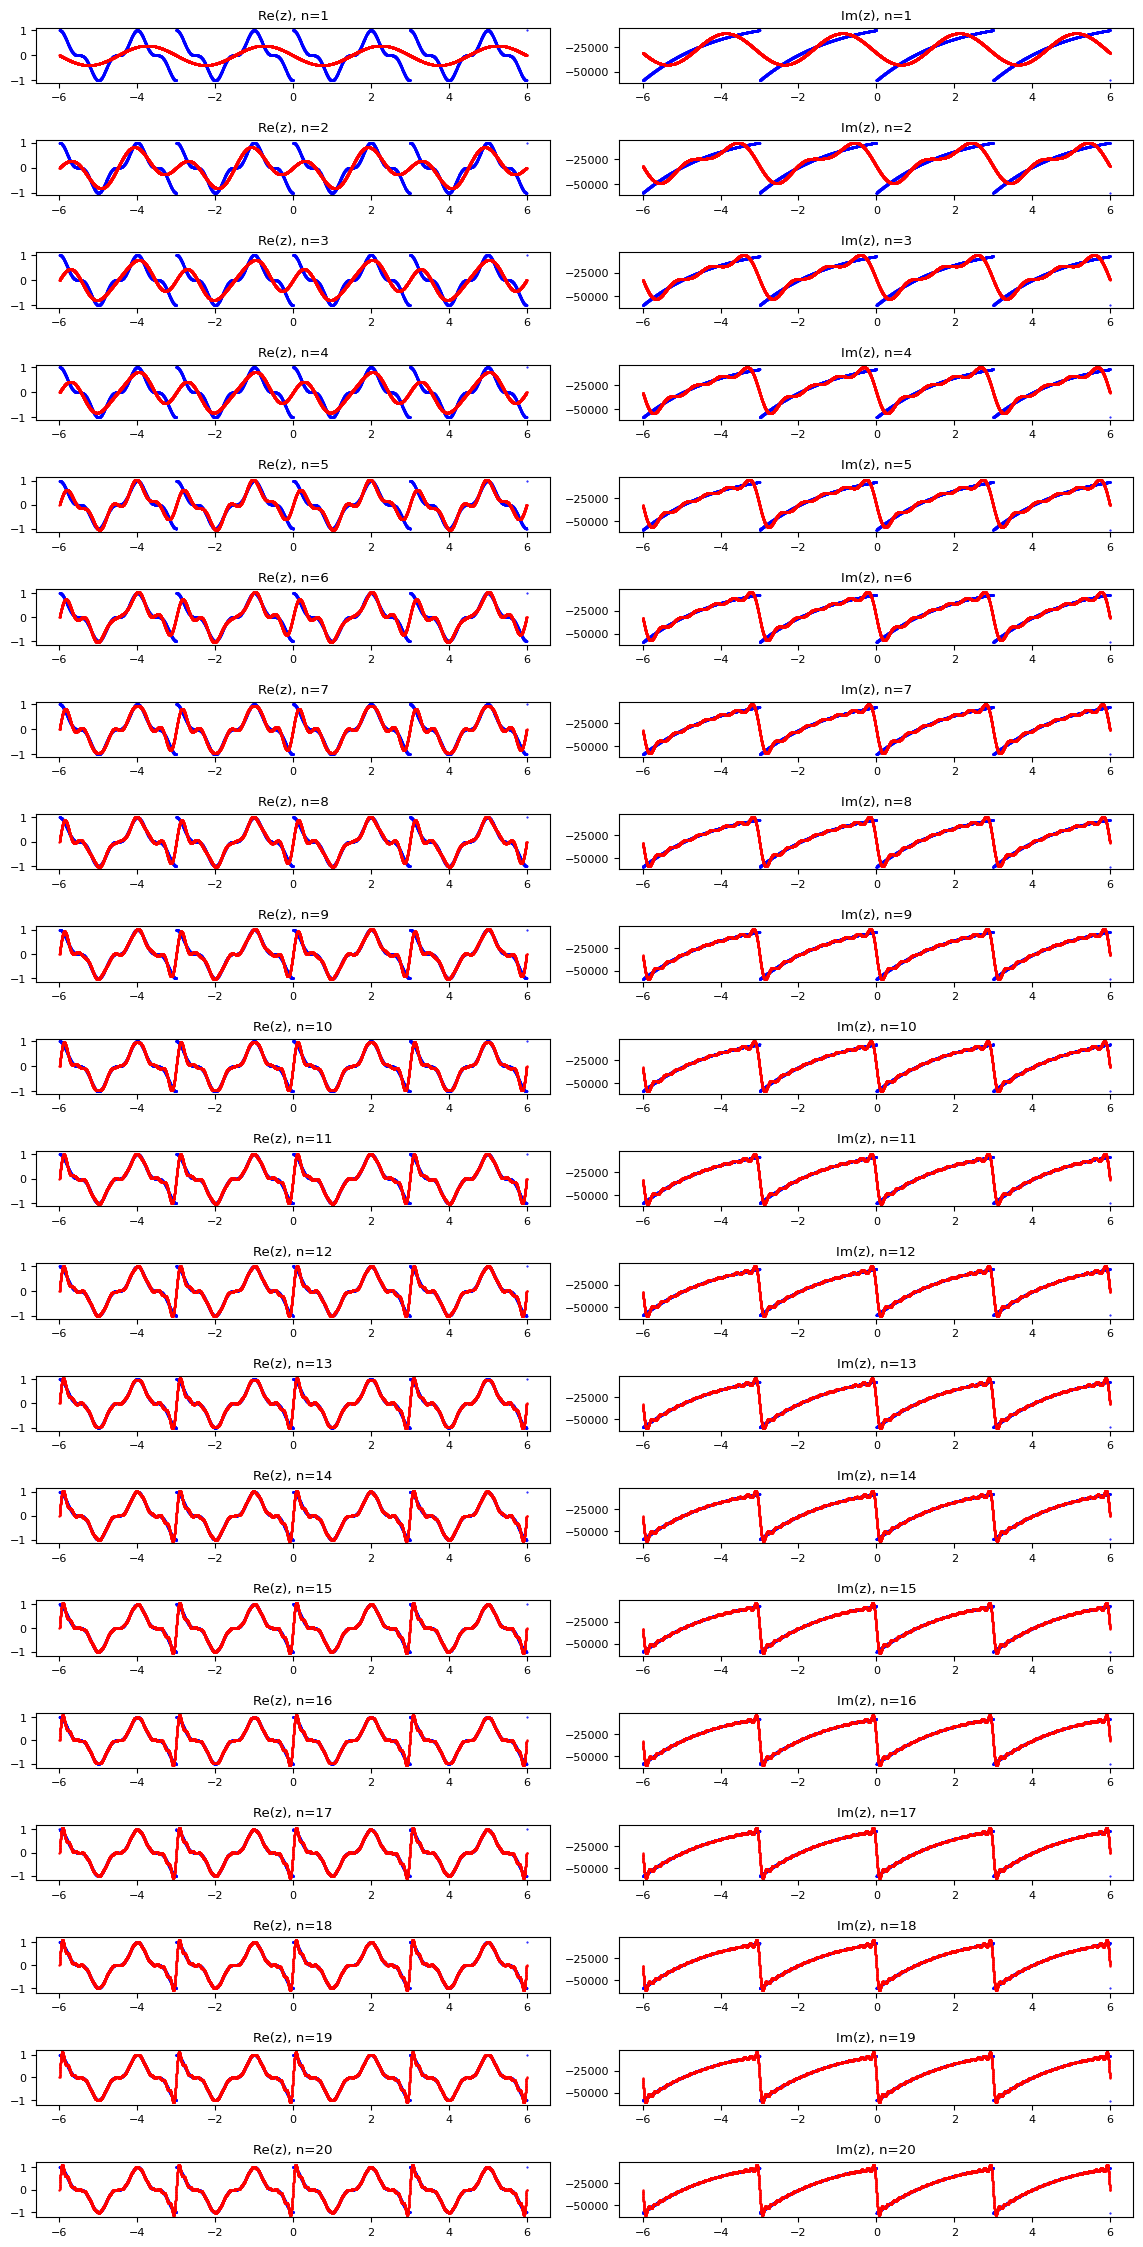

In [174]:
showGraph()